In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import Video
from IPython.display import Image, display

In [2]:
Writer = animation.writers['pillow']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

In [3]:
plt.rcParams['animation.ffmpeg_path'] = '/Users/carlovoss/usr/local/bin/ffmpeg'
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

## Analysis of Cell State - 7 Dimensions

In [6]:
prediction_1 = pd.read_csv("../../visualisation/files/prediction/MLE/artifical_2_signals_cell_state.csv", sep=";")
latent_space = prediction_1.iloc[:,10:25]

In [7]:
latent_space.head()

,cell_state_0,cell_state_1,cell_state_2,cell_state_3,cell_state_4,cell_state_5,cell_state_6,cell_state_7,cell_state_8,cell_state_9,cell_state_10,cell_state_11,cell_state_12,cell_state_13,cell_state_14
0,-0.331213,-0.404570,-0.093982,0.889129,-0.438969,0.416014,0.214447,0.715540,-1.919262,-0.404148,0.432210,0.337220,0.225963,-0.503775,-0.410294
1,-0.321591,-0.654786,0.061228,0.609869,-0.608961,0.339855,0.117222,0.778251,-1.549377,-0.026401,0.282278,0.259377,0.482939,0.344591,-0.021480
2,-0.192961,-0.631691,0.155390,0.401362,-0.645300,0.258822,0.211646,0.811790,-1.339358,0.351927,0.040743,0.251096,0.594160,0.803193,0.183734
3,0.050570,-0.633384,0.202653,0.200388,-0.647265,0.173189,0.364100,0.895934,-1.127712,0.654661,-0.163743,0.239933,0.648258,1.225374,0.366916
4,0.178612,-0.546713,0.206387,0.202800,-0.558939,0.037310,0.499875,0.871465,-1.091353,0.734642,-0.373567,0.330165,0.569696,1.187358,0.218975


### PCA

In [10]:
pca = PCA(n_components=15)
columns = []
for i in range(latent_space.shape[1]):
    columns.append("pc"+str(i))
principalComponents = pca.fit_transform(latent_space)
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
status = prediction_1["anomaly"]
finalDf = pd.concat([principalDf, status], axis = 1)
finalDf.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,anomaly
0,-0.665741,-1.853049,1.928354,-0.069404,-0.359303,0.046687,0.087647,0.154772,0.106084,0.082798,0.045240,0.034811,-0.055509,0.038396,0.019403,0
1,-0.426501,-1.711195,1.024987,0.558465,-0.460974,-0.185813,-0.010989,-0.086397,0.079484,0.246575,0.088979,0.034026,-0.004854,-0.036019,0.000362,0
2,-0.163646,-1.692002,0.364528,0.814226,-0.428227,-0.221190,-0.041711,-0.154320,0.002775,0.140751,0.059063,0.017299,-0.011565,-0.014721,0.009037,0
3,0.095126,-1.665113,-0.296929,0.903251,-0.430698,-0.247085,-0.048126,-0.234372,-0.049022,0.071636,0.010537,0.046378,-0.004547,0.024345,-0.004975,0
4,0.330370,-1.696290,-0.372671,0.731965,-0.306298,-0.098016,0.019238,-0.139672,-0.038952,-0.035449,0.008679,-0.018235,-0.010890,0.015724,0.007815,0


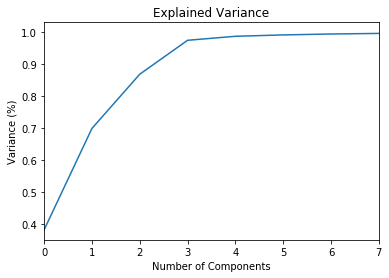

In [11]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.xlim(0,7)
plt.show()

### Visualisation of Principal Component 0 and 1
The Blue Points are ground truth (anomaly points)

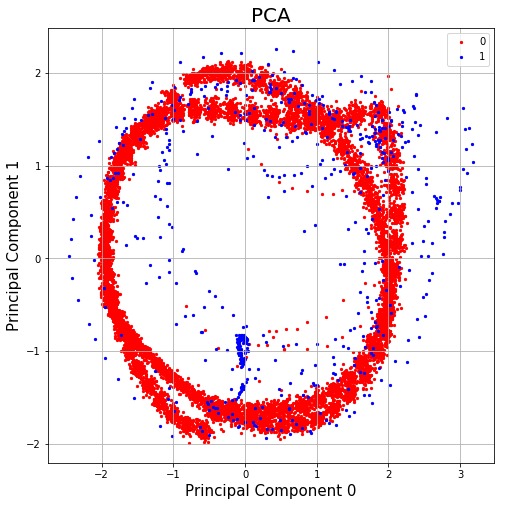

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 0', fontsize = 15)
ax.set_ylabel('Principal Component 1', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['anomaly'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc0']
               , finalDf.loc[indicesToKeep, 'pc1']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

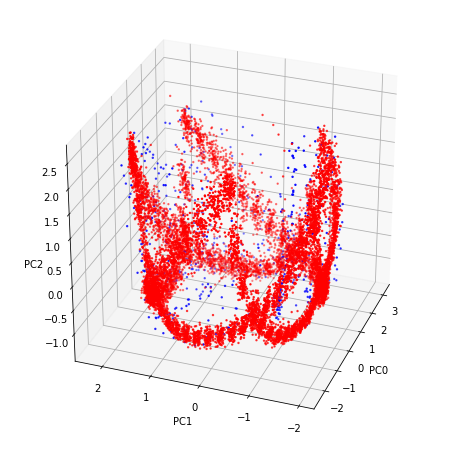

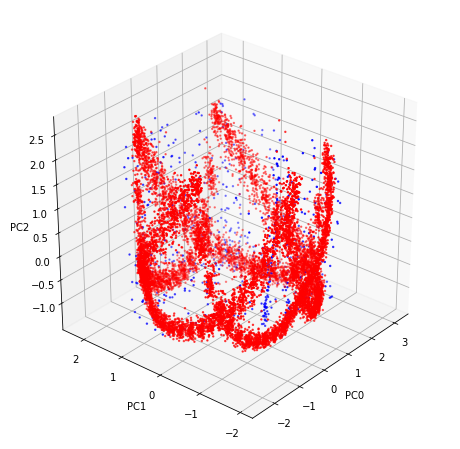

In [13]:
for i in range(200,240,20):
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    ax = fig.add_subplot(111, projection='3d')
    targets = [0, 1]
    colors = ['r','b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['anomaly'] == target
        xs = finalDf.loc[indicesToKeep, 'pc0']
        ys = finalDf.loc[indicesToKeep, 'pc1']
        zs = finalDf.loc[indicesToKeep, 'pc2']
        ax.scatter(xs, ys, zs, c = color, s = 2)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC0')
    ax.set_ylabel('PC1')
    ax.set_zlabel('PC2')
    plt.show()


### Visualise time dynamics

In [ ]:
%%capture
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax = fig.add_subplot(111, projection='3d')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_zlim(-1.5,1.5)
ax.view_init(azim=120) 
data = finalDf.iloc[9500:,]
data = data.reset_index(drop=True)

def animate_3d(i):
    xs = data.iloc[i:i+1, 0]
    ys = data.iloc[i:i+1, 1]
    zs = data.iloc[i:i+1, 2]
    if data.iloc[i, 7] == 0:
        color = "b"
    else:
        color = "r"
    graph = ax.scatter(xs, ys, zs, c = color, s =2)
    return graph

ani = animation.FuncAnimation(fig, animate_3d, frames=3000, blit=False)
ani.save("3d_artifical_data.mp4", writer=writer)


In [11]:
Video("3d_artifical_data.mp4")

## Visualisation of Principal Component 5 and 6

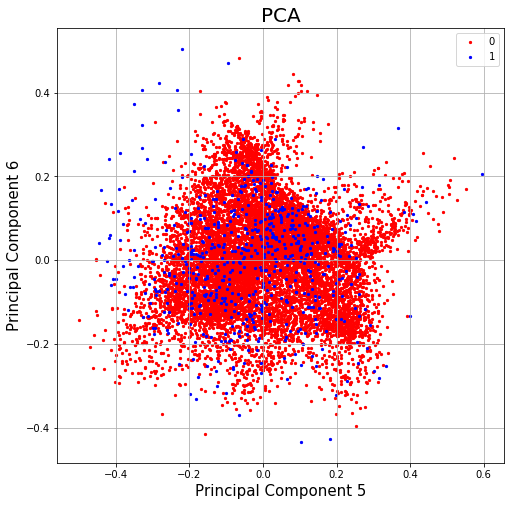

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 5', fontsize = 15)
ax.set_ylabel('Principal Component 6', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['anomaly'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc5']
               , finalDf.loc[indicesToKeep, 'pc6']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

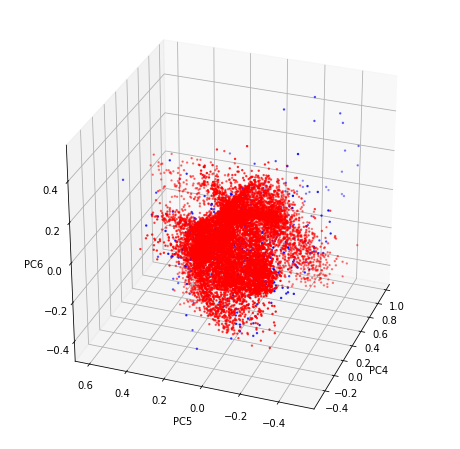

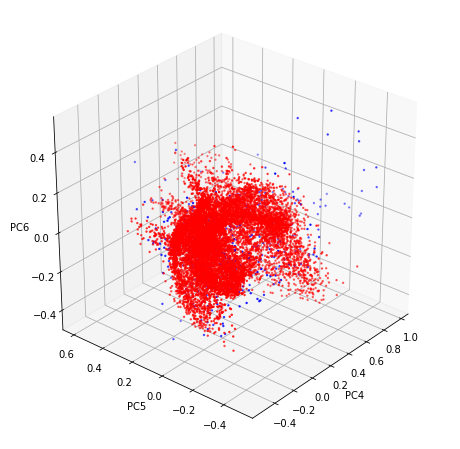

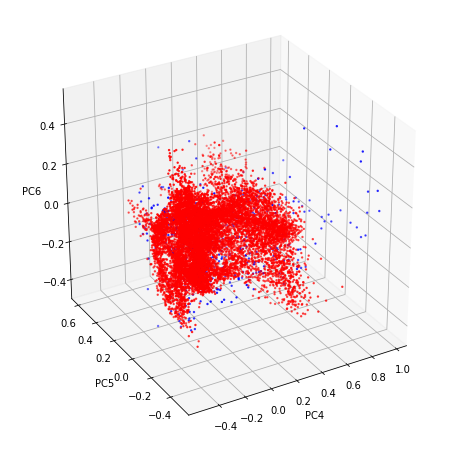

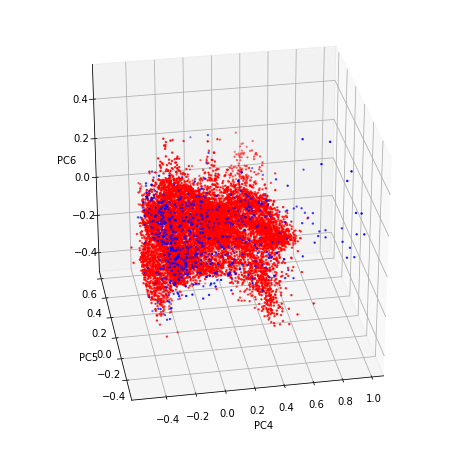

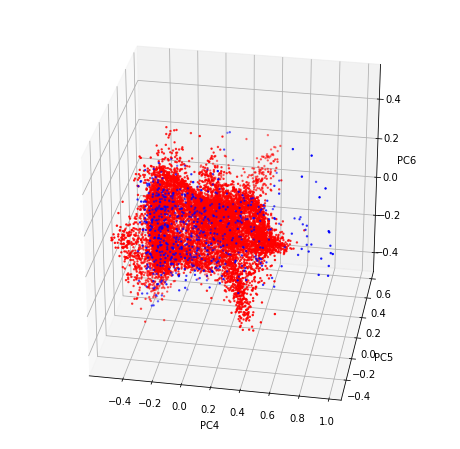

In [15]:
for i in range(200,300,20):
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    ax = fig.add_subplot(111, projection='3d')
    targets = [0, 1]
    colors = ['r','b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['anomaly'] == target
        xs = finalDf.loc[indicesToKeep, 'pc4']
        ys = finalDf.loc[indicesToKeep, 'pc5']
        zs = finalDf.loc[indicesToKeep, 'pc6']
        ax.scatter(xs, ys, zs, c = color, s = 2)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC4')
    ax.set_ylabel('PC5')
    ax.set_zlabel('PC6')
    plt.show()